In [1]:
import pandas as pd
import json
import re
# from embeddings import FastTextEmbedding
import tensorflow_datasets as tfds

gpt = []
thropic = []
questions = []
test_dataset = []

with open('gpt.txt', 'r') as g:
  for line in g:
    gpt.append(line)

with open('thropic.txt', 'r') as t:
  for line in t:
    thropic.append(line)

with open('controversial.txt', 'r') as q:
  for line in q:
    questions.append(line)

with open('new_data.txt', 'r') as n:
  for line in n:
    test_dataset.append(line)

print(len(gpt))
print(len(thropic))
print(len(questions))

200
200
309


In [3]:
from googleapiclient import discovery
import json
import numpy as np
import time

In [19]:
import time
import numpy as np
import requests

# headers = {"Authorization": f" your bearer token here"}

API_URL_toxic = (
    "https://api-inference.huggingface.co/models/facebook/roberta-hate-speech-dynabench-r4-target"
)

def query_tox(payload):
    response = requests.post(API_URL_toxic, headers=headers, json=payload)
    return response.json()


def toxicity(text):
    output = query_tox(
        {
            "inputs": text,
        }
      )
    score = output[0][0]["score"]
    return score

# scores = []
# for idx in range(50,100):
#     g_s = toxicity(gpt[idx])
#     time.sleep(1)
#     t_s = toxicity(thropic[idx])
#     if g_s > t_s:
#       scores.append(1)
#     elif t_s > g_s:
#       scores.append(0)
#     else:
#       scores.append(0.5)

# scores = pd.DataFrame(scores)
# scores.to_csv("data1.csv")


In [6]:
from sentence_transformers import SentenceTransformer

In [7]:
model = SentenceTransformer('bert-base-nli-mean-tokens')

In [ ]:
# from sklearn.decomposition import PCA
# pca_2 = PCA(n_components=2)
# pca_2_result = pca_2.fit_transform(embeddings)
# print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))

# # >> Explained variation per principal component: [0.36198848 0.1920749 ]

# print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

Explained variation per principal component: [0.08135114 0.07024852]
Cumulative variance explained by 2 principal components: 15.16%


In [ ]:
# dataset_pca = pd.DataFrame(abs(pca_2.components_), columns=embeddings.columns, index=['PC_1', 'PC_2'])
# print('\n\n', dataset_pca)

1. Loading llm dataset



2. Reducing via PCA

Explained variation per principal component: [0.08135121 0.07024865]
Cumulative variance explained by 2 principal components: 15.16%


            0         1         2         3         4         5         6    \
PC_1  0.005087  0.042430  0.040403  0.008836  0.051632  0.025555  0.088601   
PC_2  0.012122  0.027371  0.008571  0.001170  0.012711  0.040842  0.066688   

           7         8         9    ...       758       759       760  \
PC_1  0.006648  0.005440  0.077636  ...  0.002880  0.055138  0.023199   
PC_2  0.029500  0.021797  0.022329  ...  0.035396  0.020329  0.027152   

           761       762       763       764       765       766       767  
PC_1  0.090592  0.015942  0.003908  0.053799  0.035203  0.010521  0.007950  
PC_2  0.057278  0.016125  0.038585  0.030538  0.063836  0.038757  0.041111  

[2 rows x 768 columns]

*************** Theimportant features *************************
As per PC 1:
 Series([], Name: PC_1, dtype

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



 Centroids: [ 2.792646  -2.8845077] [-0.26545227  0.27418396]


4. Visualizing


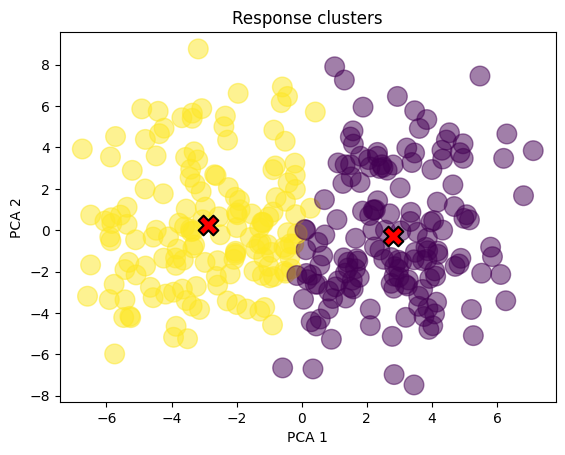



5. Test on New Data


,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.251362,-0.473116,0.673876,0.342669,0.407265,-1.209825,-0.116453,0.307005,-0.303646,0.099180,...,-0.320722,-0.714421,-0.162176,0.199367,0.234948,-1.003750,-0.684095,-0.309162,-0.835235,-0.314972
1,0.414112,0.049596,0.078633,0.005125,0.398597,-0.095895,0.722309,0.040672,0.116824,0.476192,...,-0.650389,0.275808,0.233114,-1.827022,-0.098524,-0.794249,0.327062,-0.811929,-1.076285,0.269245
2,-0.302451,0.333278,0.216324,-0.143484,0.015577,0.396539,0.949128,-0.858407,0.365757,0.284130,...,-0.457861,-0.451460,0.046290,-1.934081,0.261542,0.004641,-0.772981,-0.385921,-0.060869,0.400257
3,0.203649,-0.267012,0.507062,0.211722,0.984485,0.015155,0.109670,0.090465,0.426156,-0.166381,...,-0.677682,-0.419401,0.010962,-0.552550,0.070139,-0.624029,-0.597001,0.026979,-0.920972,0.066395
4,0.550206,-0.105063,0.737698,-0.085773,0.145181,-0.450825,0.653988,0.256539,0.315589,0.339742,...,-0.326570,0.573699,-0.263309,-1.221693,-0.605977,-0.387712,-0.413408,-0.809010,-1.264589,0.119220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,-0.131875,0.380124,-0.070451,0.087433,0.413775,0.174719,0.876151,-0.341500,0.594119,-0.184453,...,-0.132842,-0.475378,-0.751457,-1.675319,-0.277056,-0.161123,-0.725480,-0.198063,-0.711353,-0.296673
305,0.061252,0.114134,0.324867,-0.101517,0.206694,0.171681,0.562956,-0.454805,0.569592,-0.932591,...,-0.315182,-1.481935,-0.891316,-0.711381,-0.523279,-0.301573,-1.275680,0.130162,-1.385315,-0.394153
306,0.607798,-0.190180,0.712541,-0.012098,1.019058,0.274684,0.622497,-0.513632,0.542408,-0.333833,...,0.008976,-0.758287,0.017610,-0.789890,-0.202121,-0.513803,-0.983903,0.146384,-1.085141,-0.503093
307,-0.174684,0.522154,-0.405942,0.134383,-0.437874,0.299732,0.548587,0.395331,-0.054306,0.005971,...,0.028414,-0.230795,-0.827832,-1.798170,-0.113696,-0.617785,-0.003950,-0.397370,-0.531561,-0.168923


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

sentence_embeddings_base = model.encode(questions)
embeddings = pd.DataFrame(sentence_embeddings_base)


def pca_embeddings():
    """To reduce the dimensions of the wine dataset we use Principal Component Analysis (PCA).
    Here we reduce it from 11 dimensions to 2.

    :param df_scaled: scaled data
    :return: pca result, pca for plotting graph
    """
    pca_2 = PCA(n_components=2)
    pca_2_result = pca_2.fit_transform(embeddings)
    print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))
    print('Cumulative variance explained by 2 principal components: {:.2%}'.format(
        np.sum(pca_2.explained_variance_ratio_)))

    # Results from pca.components_
    dataset_pca = pd.DataFrame(abs(pca_2.components_), columns=embeddings.columns, index=['PC_1', 'PC_2'])
    print('\n\n', dataset_pca)

    print("\n*************** Theimportant features *************************")
    print('As per PC 1:\n', (dataset_pca[dataset_pca > 0.3].iloc[0]).dropna())
    print('\n\nAs per PC 2:\n', (dataset_pca[dataset_pca > 0.3].iloc[1]).dropna())
    print("\n******************************************************************")

    return pca_2_result, pca_2


def visualization(pca_result, label, centroids_pca):
    """ Visualization

    :param pca_result: PCA applied data
    :param label: K Means labels
    :param centroids_pca: PCA format K Means centroids
    """
    # ------------------ Using Matplotlib for plotting-----------------------
    x = pca_result[:, 0]
    y = pca_result[:, 1]

    plt.scatter(x, y, c=label, alpha=0.5, s=200)  # plot different colors per cluster
    plt.title('Response clusters')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')

    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, linewidths=1.5,
                color='red', edgecolors="black", lw=1.5)

    plt.show()





print("1. Loading llm dataset\n")
data_scaled = embeddings

print("\n\n2. Reducing via PCA\n")
pca_result, pca_2 = pca_embeddings()

kmeans = KMeans(n_clusters=2)
kmeans.fit(data_scaled)

centroids = kmeans.cluster_centers_
centroids_pca = pca_2.transform(centroids)
print("\n Centroids:",centroids_pca[:,0], centroids_pca[:,1])
print("\n\n4. Visualizing")
visualization(pca_result, kmeans.labels_, centroids_pca)

print("\n\n5. Test on New Data")
embeddings

In [9]:
datapoints = []

centroid1 = [2.792643, -2.8845055]
centroid2 = [-0.26543984, 0.27417147]

def euclid(point1, point2):
  val = (point1[0]-point2[0])*(point1[0]-point2[0]) + (point1[1]-point2[1])*(point1[1]-point2[1])
  return val

for datapoint in test_dataset:
  datapoints.append(model.encode(datapoint))

pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(datapoints)

predictions = []
for emb in pca_2_result:
  if euclid(list(emb), centroid1) < euclid(list(emb), centroid2):
    predictions.append(0)
  else:
    predictions.append(1)
 
print("Predictions for test dataset:")
predictions

Predictions for test dataset:


[0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0]

In [21]:
# Analyze API scores for the test dataset to see how the models perform
gpt_response_new = []

with open("gpt_answers.txt", "r") as g:
  for line in g:
    gpt_response_new.append(line)

thropic_response_new = []

with open("thropic_answers.txt", "r") as t:
  for line in t:
    thropic_response_new.append(line)

new_scores = []

gpt_avg_score = []
claude_avg_score = []


n_examples = 50
for idx in range(n_examples):
    g_s = toxicity(gpt_response_new[idx])
    gpt_avg_score.append(g_s)
    time.sleep(1)
    t_s = toxicity(thropic_response_new[idx])
    claude_avg_score.append(t_s)
    if g_s > t_s:
      new_scores.append(1)
    elif t_s > g_s:
      new_scores.append(0)
    else:
      new_scores.append(0.5)

new_scores

count = 0
for i in range(n_examples):
  if new_scores[i] == predictions[i]:
    count += 1

print("Accuracy: ", count/n_examples)
old = [1,1,0,1,0,1,1,0,0,0]

print("GPT avg score: ", sum(gpt_avg_score)/n_examples)
print("Claude avg score: ", sum(claude_avg_score)/n_examples)

Accuracy:  0.56
GPT avg score:  0.9994891703128814
Claude avg score:  0.9946251618862152
